# Adult income dataset

`Author:` [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)\
`Date:` 7-June-2024\
[Send me an email](mailto:mohammadebad1@hotmail.com)\
[Visit my GitHub profile](https://github.com/smebad)



[Link of the original dataset](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

## `About Dataset:`

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

## `Objectives:`
* To understand the factors influencing income.
* To build and optimize a machine learning model to predict whether an individual earns more than 50K annually.

### Importing Libraries

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### Load and Explore the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('adult.csv')

# Display the first few rows of the dataframe
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# Reviewing the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# Display value counts for various categorical columns
print("Education value counts:")
print(df.education.value_counts())

print("\nWorkclass value counts:")
print(df.workclass.value_counts())

print("\nOccupation value counts:")
print(df.occupation.value_counts())

print("\nGender value counts:")
print(df.gender.value_counts())

Education value counts:
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

Workclass value counts:
workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

Occupation value counts:
occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2

`Data Exploration:`

Initial exploration of the dataset revealed various categorical and numerical features that potentially influence an individual's income. Key categorical features include education, workclass, occupation, gender, marital status, relationship, race, and native country. Numerical features include age, educational number, capital gain, and capital loss.

### Data Preprocessing

In [5]:
# One-hot encode categorical variables
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation, dtype=int).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass, dtype=int).add_prefix('workclass_')], axis=1)
df = df.drop('education', axis=1)  # Drop the 'education' column since we have 'educational-num'
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status'], dtype=int).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship, dtype=int).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race, dtype=int).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country'], dtype=int).add_prefix('native-country_')], axis=1)

In [6]:
# Convert gender to binary
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Clean and map the income column
df['income'] = df['income'].str.strip()  # Remove any leading/trailing whitespace
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0 if x == '<=50K' else None)

In [7]:
# Ensure no NaN values in the income column as the data was showing NaN values in my IDE
df = df.dropna(subset=['income'])

In [8]:
# Drop 'fnlwgt' column as it is not relevant for analysis
df = df.drop('fnlwgt', axis=1)

`Data Preprocessing:`

Several preprocessing steps were performed to prepare the data for analysis and modeling :-

* One-Hot Encoding: Categorical variables such as occupation, workclass, marital status, relationship, race, and native country were one-hot encoded to convert them into numerical format.
* Binary Conversion: Gender was converted into a binary variable (1 for Male, 0 for Female).
* Income Mapping: The target variable, income, was cleaned and mapped to binary values (1 for '>50K' and 0 for '<=50K').
* Column Dropping: The 'education' column was dropped in favor of the 'educational-num' column, and the 'fnlwgt' column was dropped due to its irrelevance to the analysis.
* Handling NaN Values: Any remaining NaN values in the income column were removed.

### Exploratory Data Analysis

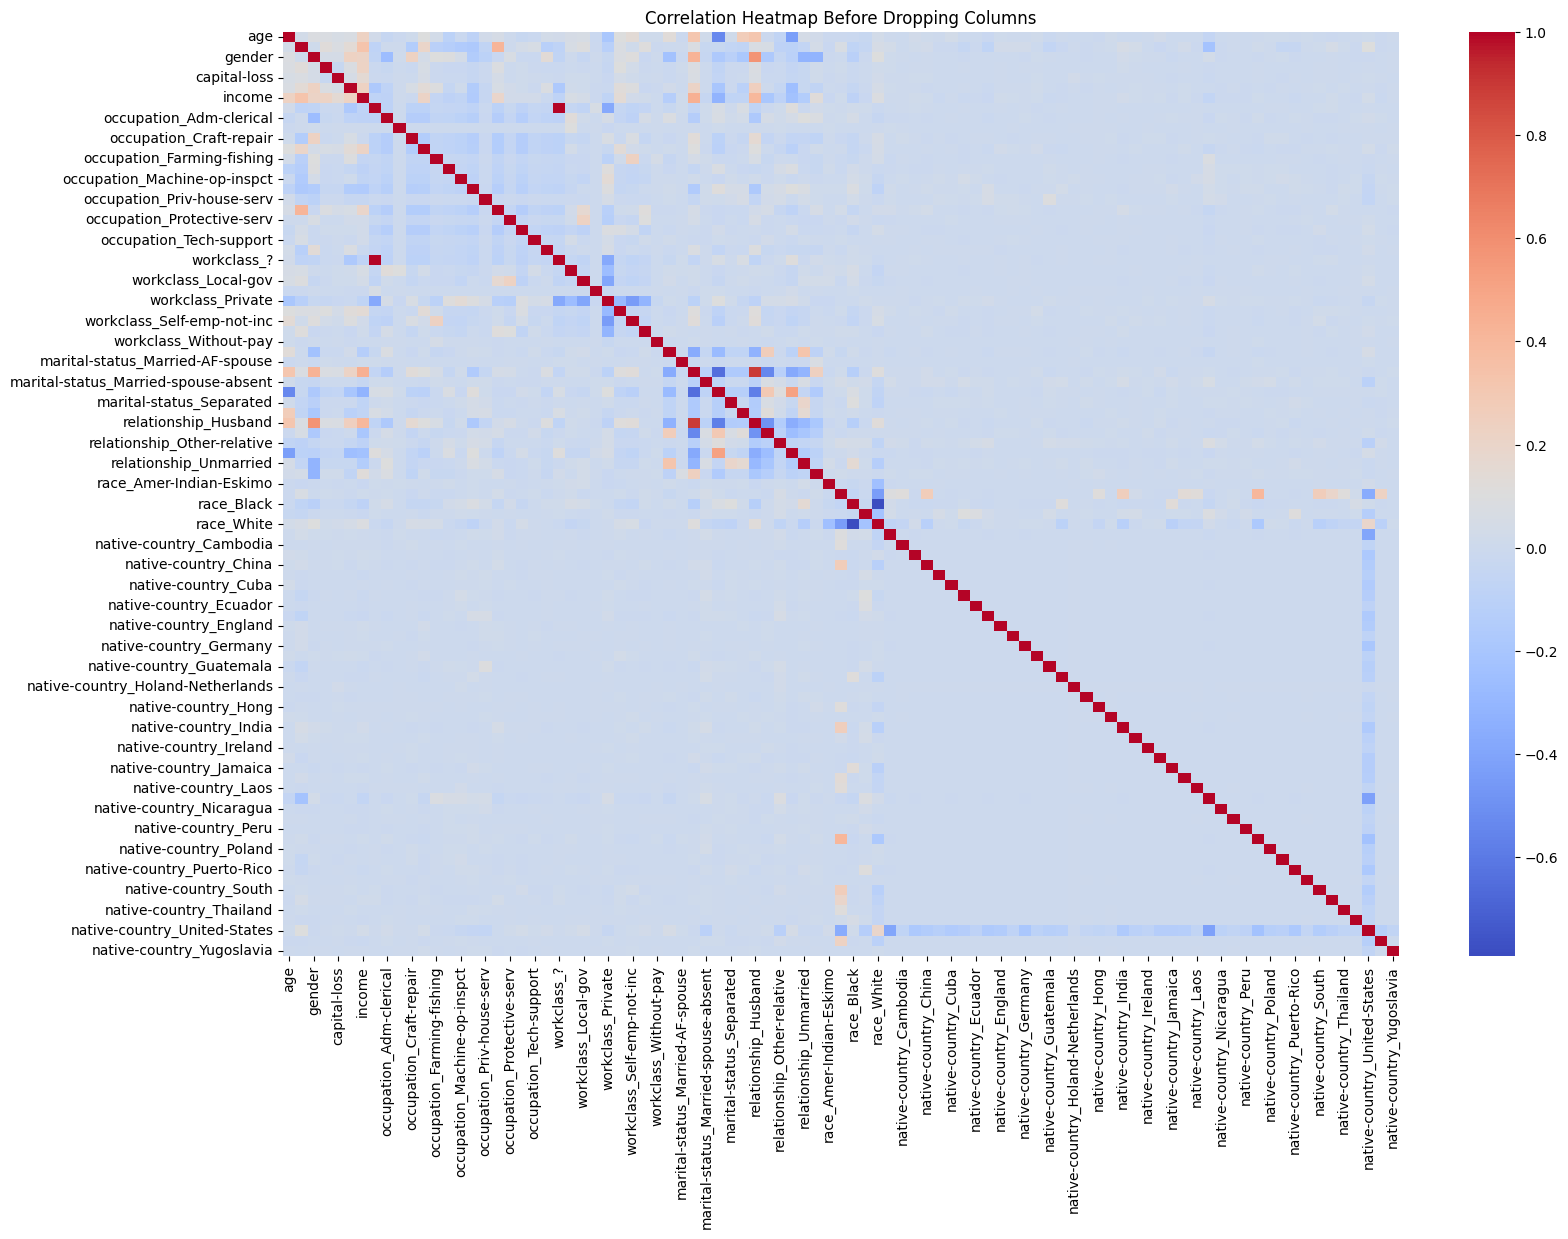

In [9]:
# Generate correlation heatmap before dropping columns with low correlation
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap Before Dropping Columns')
plt.show()

In [10]:
# Drop columns with low correlation to income (below threshold)
correlations = df.corr()['income'].abs()
threshold = 0.1
cols_drop = correlations[correlations < threshold].index

In [11]:
# Drop low correlation columns
df_dropped = df.drop(cols_drop, axis=1)

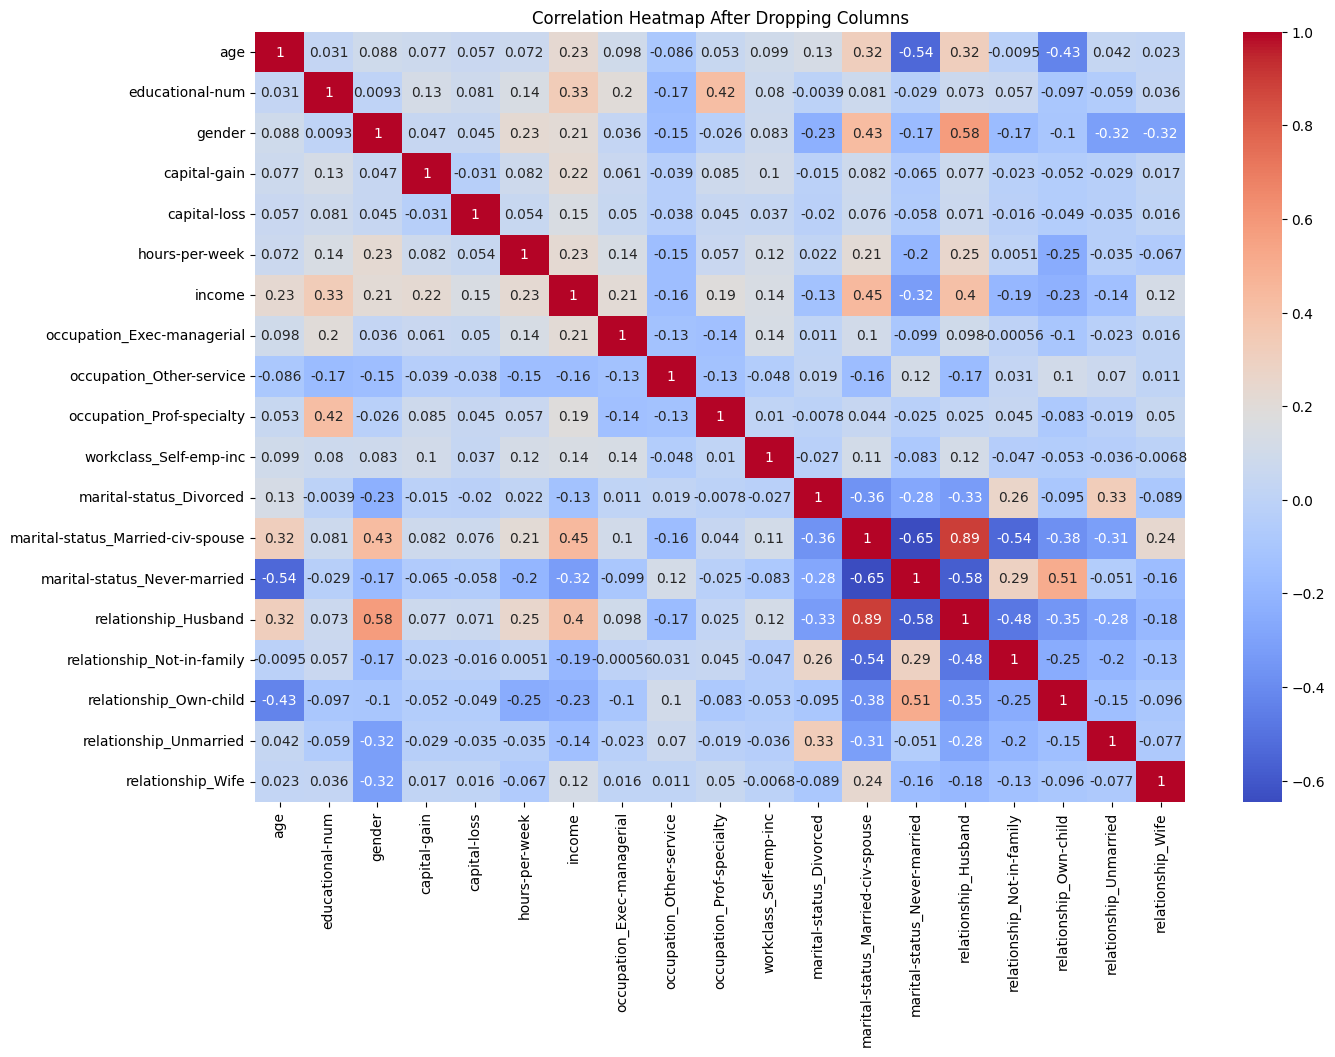

In [12]:
# Generate correlation heatmap after dropping columns with low correlation
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap After Dropping Columns')
plt.show()

`Correlation Analysis:`

Correlation heatmaps were generated before and after dropping columns with low correlation to the income variable. The initial heatmap provided a comprehensive view of relationships between all features and the target variable. Columns with a correlation threshold below 0.1 were dropped to simplify the model and focus on the most impactful features.

### Model Training and Evaluation

In [13]:
# Split data into training and test sets
train_df, test_df = train_test_split(df_dropped, test_size=0.2, random_state=42)

In [14]:
# Reviewing the train data
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
37193,42,10,1,0,0,40,0,0,0,0,0,0,1,0,1,0,0,0,0
31093,52,6,1,0,0,35,0,0,0,0,0,0,1,0,1,0,0,0,0
33814,34,9,1,0,0,40,0,0,0,0,0,0,1,0,1,0,0,0,0
14500,28,9,0,0,0,40,0,0,0,0,0,0,0,1,0,1,0,0,0
23399,46,11,1,0,0,50,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,9,1,0,0,40,0,0,1,0,0,0,0,0,0,1,0,0,0
44732,34,10,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
38158,28,10,0,0,0,40,0,1,0,0,0,1,0,0,0,1,0,0,0
860,46,11,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0


In [15]:
# Reviewing the test data
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
7762,56,9,0,0,0,40,0,0,1,0,0,1,0,0,0,0,0,1,0
23881,25,9,1,0,0,40,0,0,0,0,0,0,1,0,0,0,1,0,0
30507,43,13,0,14344,0,40,1,0,0,1,0,1,0,0,0,1,0,0,0
28911,32,9,1,0,0,40,0,0,0,0,0,0,1,0,1,0,0,0,0
19484,39,13,0,0,0,30,0,0,0,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,50,14,1,0,0,60,1,1,0,0,0,0,1,0,1,0,0,0,0
18798,51,13,1,5178,0,60,1,1,0,0,0,0,1,0,1,0,0,0,0
29519,25,13,0,0,0,38,1,0,0,1,0,0,1,0,0,0,0,0,1
550,18,7,1,0,0,25,0,0,0,0,0,0,0,1,0,0,1,0,0


In [16]:
# Separate features and target variable for training and test sets
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']
test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [17]:
# Train a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_y)

RandomForestClassifier(random_state=42)

In [18]:
# Evaluate the model
train_score = rf.score(train_X, train_y)
test_score = rf.score(test_X, test_y)
print(f'Training Accuracy: {train_score:.4f}')
print(f'Test Accuracy: {test_score:.4f}')

Training Accuracy: 0.9386
Test Accuracy: 0.8484


In [19]:
# Display feature importances
importances = dict(zip(rf.feature_names_in_, rf.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}
print("Feature Importances:")
for feature, importance in importances.items():
    print(f'{feature}: {importance:.4f}')

Feature Importances:
age: 0.2374
educational-num: 0.1419
capital-gain: 0.1375
hours-per-week: 0.1346
marital-status_Married-civ-spouse: 0.1073
relationship_Husband: 0.0604
capital-loss: 0.0491
occupation_Exec-managerial: 0.0234
marital-status_Never-married: 0.0233
occupation_Prof-specialty: 0.0206
gender: 0.0116
relationship_Wife: 0.0109
relationship_Not-in-family: 0.0088
workclass_Self-emp-inc: 0.0083
occupation_Other-service: 0.0079
marital-status_Divorced: 0.0074
relationship_Own-child: 0.0066
relationship_Unmarried: 0.0030


`Model Training and Evaluation:`

A RandomForestClassifier was trained on the preprocessed data. The dataset was split into training (80%) and testing (20%) sets. The model's performance was evaluated on both sets, achieving satisfactory accuracy scores. Feature importances were analyzed to identify which features most significantly influenced the prediction of income levels.

### Hyperparameter Tuning

In [20]:
%%time
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=10, n_jobs=-1)
grid_search.fit(train_X, train_y)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
CPU times: total: 1min 21s
Wall time: 1min 44s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [21]:
# Use the best estimator from the grid search
best_rf = grid_search.best_estimator_
print(f'Best Estimator: {best_rf}')

Best Estimator: RandomForestClassifier(max_depth=10, min_samples_split=4, random_state=42)


In [22]:
# Evaluate the tuned model
best_train_score = best_rf.score(train_X, train_y)
best_test_score = best_rf.score(test_X, test_y)
print(f'Training Accuracy after tuning: {best_train_score:.4f}')
print(f'Test Accuracy after tuning: {best_test_score:.4f}')

Training Accuracy after tuning: 0.8664
Test Accuracy after tuning: 0.8661


In [23]:
# Display feature importances for the tuned model
best_importances = dict(zip(best_rf.feature_names_in_, best_rf.feature_importances_))
best_importances = {k: v for k, v in sorted(best_importances.items(), key=lambda item: item[1], reverse=True)}
print("Feature Importances after tuning:")
for feature, importance in best_importances.items():
    print(f'{feature}: {importance:.4f}')

Feature Importances after tuning:
capital-gain: 0.1947
marital-status_Married-civ-spouse: 0.1934
educational-num: 0.1763
relationship_Husband: 0.1028
age: 0.0661
hours-per-week: 0.0533
capital-loss: 0.0524
marital-status_Never-married: 0.0420
occupation_Exec-managerial: 0.0254
occupation_Prof-specialty: 0.0245
relationship_Wife: 0.0171
gender: 0.0103
relationship_Not-in-family: 0.0102
relationship_Own-child: 0.0092
marital-status_Divorced: 0.0077
occupation_Other-service: 0.0064
workclass_Self-emp-inc: 0.0048
relationship_Unmarried: 0.0035


`Hyperparameter Tuning:`

GridSearchCV was employed to optimize the hyperparameters of the RandomForestClassifier. Various combinations of hyperparameters were tested to find the best model. The tuned model's performance showed improved accuracy, indicating that hyperparameter tuning was effective in enhancing the model's predictive capabilities.

# Explanation:

* `Libraries Import:` Importing required libraries for data manipulation, visualization, and model training.
* `Data Loading and Initial Exploration:` Loading the dataset and displaying initial value counts for key columns.
* `Data Preprocessing:` One-hot encoding for categorical variables, converting gender to binary, cleaning the income column, and ensuring no NaN values.
* `Correlation Heatmap:` Generating heatmaps before and after dropping columns with low correlation to the target variable (income).
* `Model Training:` Splitting the data into training and test sets, training a RandomForestClassifier, and evaluating its performance.
* `Feature Importances:` Displaying feature importances to understand the impact of each feature on the model.
* `Hyperparameter Tuning:` Using GridSearchCV for hyperparameter tuning and evaluating the best model.

# Conclusion:

The analysis successfully explored the Adult Income dataset, identified key features influencing income, and built a robust predictive model. The RandomForestClassifier, combined with thorough preprocessing and hyperparameter tuning, provided strong performance in predicting whether an individual's income exceeds $50,000. This analysis highlights the importance of data preprocessing, feature selection, and model optimization in machine learning projects. As we could also explore other modeling techniques, such as gradient boosting or deep learning, and further refine feature engineering to potentially improve predictive performance.